In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
mnist = pd.read_csv(r'D:\Datasets\MNIST_Train.csv')

In [3]:
mnist= np.array(mnist)

In [4]:
mnist_x = mnist[:,1:]
mnist_y = mnist[:,0]

In [5]:
mnist.shape

(42000, 785)

In [6]:
from sklearn.model_selection import train_test_split
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size = .2)

In [7]:
mnist_x_train = mnist_x_train.reshape(-1,28,28,1)

In [8]:
mnist_x_test = mnist_x_test.reshape(-1,28,28,1)

In [9]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test)

In [10]:
mnist_y_train = to_categorical(mnist_y_train) # one hot encoding, dummy variables

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model.fit(mnist_x_train, mnist_y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
420/420 [==============================] - 7s 16ms/step - loss: 0.3442 - accuracy: 0.8969 - val_loss: 0.1295 - val_accuracy: 0.9631
Epoch 2/5
420/420 [==============================] - 6s 14ms/step - loss: 0.1240 - accuracy: 0.9612 - val_loss: 0.0796 - val_accuracy: 0.9759
Epoch 3/5
420/420 [==============================] - 5s 13ms/step - loss: 0.0863 - accuracy: 0.9727 - val_loss: 0.0765 - val_accuracy: 0.9784
Epoch 4/5
420/420 [==============================] - 6s 13ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 5/5
420/420 [==============================] - 6s 15ms/step - loss: 0.0533 - accuracy: 0.9818 - val_loss: 0.0619 - val_accuracy: 0.9827


In [13]:
pred = model.predict(mnist_x_test)

In [14]:
pred_classes = np.argmax(pred, axis=1)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix

In [16]:
cm = cm(mnist_y_test, pred_classes)
cm

array([[785,   0,   1,   0,   0,   1,   9,   0,   3,   3],
       [  0, 951,   1,   2,   1,   0,   2,   2,   0,   0],
       [  0,   4, 823,   2,   3,   0,   2,   4,   6,   2],
       [  0,   0,   2, 872,   0,   5,   0,   2,   5,   2],
       [  0,   3,   2,   0, 792,   0,   2,   1,   1,   4],
       [  0,   0,   0,   8,   0, 720,   4,   0,   3,   0],
       [  0,   0,   0,   1,   1,   1, 880,   0,   1,   0],
       [  1,   1,   3,   0,   2,   0,   0, 852,   3,   2],
       [  3,   1,   5,   4,   2,   3,   2,   0, 798,   3],
       [  1,   1,   0,   6,  16,   2,   1,   9,   5, 755]], dtype=int64)

In [17]:
accuracy = cm.diagonal().sum()*100/cm.sum()
accuracy

97.95238095238095

In [18]:
# CNN on dog and cat classifier

In [19]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
import cv2
import matplotlib.pyplot as plt

In [27]:
path1 = r'D:\Datasets\ML Datasets\Dogs _ cats images\training_set'
cate = ['dogs', 'cats']

In [28]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\cats


In [29]:
for i in cate:
    folders = os.path.join(path1, i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        print(image_path)

D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.0.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.1.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.10.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.100.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.101.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.102.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.103.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.104.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.105.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.106.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.107.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.108.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\dogs\dog.109.jpg
D:\Datasets\ML Datasets\Dogs _ cats images\training_set\

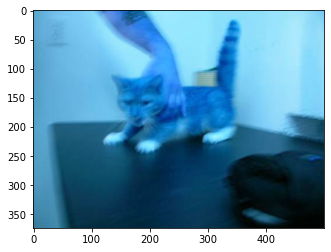

In [30]:
for i in cate:
    folders = os.path.join(path1 ,i)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) #  using the cv2 i am reading the image and storing in variable image_array
        plt.imshow(image_array)
        break
# this code is only to show that we are able to read the images

In [31]:
# above result is the x variable but we want to know the y variable

In [32]:
image_array.shape

(374, 500, 3)

In [34]:
image_size = 200  
                 
path1 = r'D:\Datasets\ML Datasets\Dogs _ cats images\training_set'
cate = ['dogs', 'cats']
    
input_image = []    
for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)   # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) #  using the cv2 i am reading the image and storing in variable image_array
        image_array =cv2.resize(image_array , (image_size  , image_size) ) # resizing each image to 50 * 50
        input_image.append([image_array , label])


In [35]:
# always shuffle your data (random sampling)

X =  []
Y =  []

for X_values , labels in input_image:
    X.append(X_values) # all the data related to pix cell 
    Y.append(labels)

In [36]:
X = np.array(X)
Y = np.array(Y)

In [37]:
Y

array([0, 0, 0, ..., 1, 1, 1])

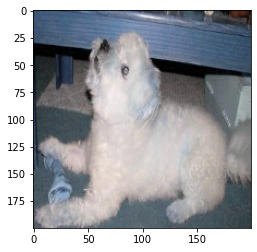

In [38]:
plt.imshow(X[12])

In [39]:
X = X/255 # to make the data unitless

In [40]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu'  ,   ))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))
model.add(Dense(2 , activation= 'softmax'))

In [41]:
X.shape[1:]

(200, 200, 3)

In [42]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])


In [43]:
model.fit(X , Y , epochs=5  )


Epoch 1/5
63/63 [==============================] - 15s 227ms/step - loss: 4.5634 - accuracy: 0.4965
Epoch 2/5
63/63 [==============================] - 15s 235ms/step - loss: 0.6977 - accuracy: 0.5175
Epoch 3/5
63/63 [==============================] - 15s 231ms/step - loss: 0.6925 - accuracy: 0.5025
Epoch 4/5
63/63 [==============================] - 14s 230ms/step - loss: 0.6914 - accuracy: 0.5050
Epoch 5/5
63/63 [==============================] - 14s 228ms/step - loss: 0.6896 - accuracy: 0.5110


In [44]:
pred = model.predict(X)

In [45]:
pred_classes = np.argmax(pred, axis=1)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix

In [47]:
cm = confusion_matrix(Y,pred_classes)
cm

array([[1000,    0],
       [ 980,   20]], dtype=int64)